In [1]:
import sys
sys.path.insert(1, '/home/patryk_patrykwrona/repos') # inserting a library's directory

from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
import numpy as np
import matplotlib.pyplot as plt

from river import optim
from river import linear_model
from river import forest
from river import tree
from river import ensemble
from river import preprocessing
from river import metrics
from river import dummy
from river import utils
from river import drift
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
          'figure.figsize': (18, 18),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

from Fleuve.master import stream_miner_master
from Fleuve.master import evaluator_master
from Fleuve.master import predictor_master
from Fleuve.master import drift_detector_master

# initialize credit card input
from Fleuve.evaluation.initialize_scripts.initialize_credit_card import InitializeCC
from Fleuve.evaluation.initialize_scripts.initialize_agrawal import InitializeA
from Fleuve.evaluation.initialize_scripts.initialize_agrawal import InitializeA_CD
from Fleuve.evaluation.initialize_scripts.initialize_hyperplane import InitializeH
from Fleuve.evaluation.initialize_scripts.initialize_credit_card_delayed import InitializeCCD
from Fleuve.evaluation.initialize_scripts.initialize_virtual_drift import InitializeVD

In [9]:
init = InitializeA_CD()
spark, input_schema, sc, sdf = init.spark, init.input_schema, init.sc, init.sdf

23/06/17 16:21:07 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/worker/evaluator.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 16:21:07 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/master/evaluator_handler.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 16:21:07 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/worker/drift_detector.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 16:21:07 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/master/drift_detector_handler.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 16:21:07 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/worker/stream_miner.py has been added already. Overwriting of added paths is not supported in the current 

In [10]:
#SET TASK
task = {"cluster-9e14-w-0": {"models": [dummy.NoChangeClassifier(), 
                                        tree.ExtremelyFastDecisionTreeClassifier(max_depth = 20), 
                                        forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 20), 
                                        tree.HoeffdingTreeClassifier(max_depth = 20)]}, 
        "cluster-9e14-w-1" : {"models": [dummy.NoChangeClassifier(), 
                                        tree.ExtremelyFastDecisionTreeClassifier(max_depth = 20), 
                                        forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 20), 
                                        tree.HoeffdingTreeClassifier(max_depth = 20)]}, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
       'eval_metrics': [utils.Rolling(metrics.Accuracy(), 10000), 
                        utils.Rolling(metrics.BalancedAccuracy(), 10000), 
                        utils.Rolling(metrics.F1(), 10000), 
                        utils.Rolling(metrics.CohenKappa(), 10000), 
                        utils.TimeRolling(metrics.Accuracy(), period=dt.timedelta(seconds = 20)), 
                        utils.TimeRolling(metrics.BalancedAccuracy(), period=dt.timedelta(seconds = 20)), 
                        utils.TimeRolling(metrics.F1(), period=dt.timedelta(seconds = 20)), 
                       utils.TimeRolling(metrics.CohenKappa(), period=dt.timedelta(seconds = 20))]}

In [11]:
data_cols = [field.name for field in input_schema.fields][:-1]

# data_cols = ['V' + str(i) for i in range(1,29)]
# data_cols.append('Amount') 

sm = stream_miner_master.StreamMinerMaster(data_cols, task)

In [5]:
data_cols

['s', 'c', 'age', 'e', 'car', 'z', 'hv', 'hy', 'l']

In [12]:
output_schema = sm.output_schema

In [6]:
sm.transform_and_collect(sdf, "/user/hdfs/evaluation/sm/case_agrawal_cd", "/user/hdfs/evaluation/sm/case_agrawal_cd/chk")

23/06/17 15:58:46 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/06/17 15:58:46 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/17 15:59:06 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 19840 milliseconds
23/06/17 15:59:30 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 24216 milliseconds
23/06/17 15:59:45 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 14779 milliseconds
23/06/17 16:00:05 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 19850 milliseconds
23/06/17 16:00:21 WARN ProcessingTimeExecutor: Current batch is fall

23/06/17 16:08:42 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 10407 milliseconds
23/06/17 16:08:54 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 11964 milliseconds
23/06/17 16:09:06 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 11591 milliseconds
23/06/17 16:09:17 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 11210 milliseconds
23/06/17 16:09:29 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 11529 milliseconds
23/06/17 16:09:40 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 11959 milliseconds
23/06/17 16:09:51 WARN ProcessingTimeExecutor: Current batch is falling behind. The trig

KeyboardInterrupt: 

In [9]:
sdf

DataFrame[s: double, c: double, age: double, e: double, car: double, z: double, hv: double, hy: double, l: double, Class: double]

In [19]:
output_schema = sm.output_schema

df = spark.read.format("csv").options(header='false').schema(output_schema). \
load("hdfs://cluster-9e14-m/user/hdfs/evaluation/sm/case_agrawal_cd")

df = df.filter(col("hostname").like("cluster-9e14-w-0"))

In [21]:
pdf = df.toPandas()

In [22]:
# pdf = pdf[pdf["hostname"] == "cluster-9e14-w-0"]
print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training

(247500, 44)
1130.4656


In [24]:
import numpy as np

np.unique(pdf.hash)

array(['f3hk1ev4p7zqngl0'], dtype=object)

In [ ]:
pdf = pdf[pdf["n"] <= 100000]

In [26]:
pdf.head()

,training_time,n,hostname,hash,model_name,prediction,R_Accuracy,R_BalancedAccuracy,R_F1,R_CohenKappa,...,model_name_4,prediction_4,R_Accuracy_4,R_BalancedAccuracy_4,R_F1_4,R_CohenKappa_4,TR_Accuracy_4,TR_BalancedAccuracy_4,TR_F1_4,TR_CohenKappa_4
0,5.968631,2501,cluster-9e14-w-0,f3hk1ev4p7zqngl0,NoChangeClassifier,0.0,0.0,0.0,0.0,-0.999201,...,HoeffdingTreeClassifier,1.0,0.666134,0.444089,0.666667,0.332533,0.666134,0.444089,0.666667,0.332533
1,5.974059,2502,cluster-9e14-w-0,f3hk1ev4p7zqngl0,NoChangeClassifier,1.0,0.0,0.0,0.0,-0.999201,...,HoeffdingTreeClassifier,0.0,0.666267,0.444178,0.666667,0.332801,0.666267,0.444178,0.666667,0.332801
2,5.978458,2503,cluster-9e14-w-0,f3hk1ev4p7zqngl0,NoChangeClassifier,0.0,0.0,0.0,0.0,-0.999201,...,HoeffdingTreeClassifier,0.0,0.666001,0.444000,0.666401,0.332268,0.666001,0.444000,0.666401,0.332268
3,5.986512,2504,cluster-9e14-w-0,f3hk1ev4p7zqngl0,NoChangeClassifier,1.0,0.0,0.0,0.0,-0.999202,...,HoeffdingTreeClassifier,0.0,0.666134,0.444089,0.666401,0.332535,0.666134,0.444089,0.666401,0.332535
4,5.990767,2505,cluster-9e14-w-0,f3hk1ev4p7zqngl0,NoChangeClassifier,0.0,0.0,0.0,0.0,-0.999202,...,HoeffdingTreeClassifier,1.0,0.666267,0.444178,0.666667,0.332801,0.666267,0.444178,0.666667,0.332801


In [27]:
pdf = pdf.sort_values(by=['n'])

In [28]:
pdf.n.describe()

count    247500.00000
mean     123750.50000
std       71447.24015
min           1.00000
25%       61875.75000
50%      123750.50000
75%      185625.25000
max      247500.00000
Name: n, dtype: float64

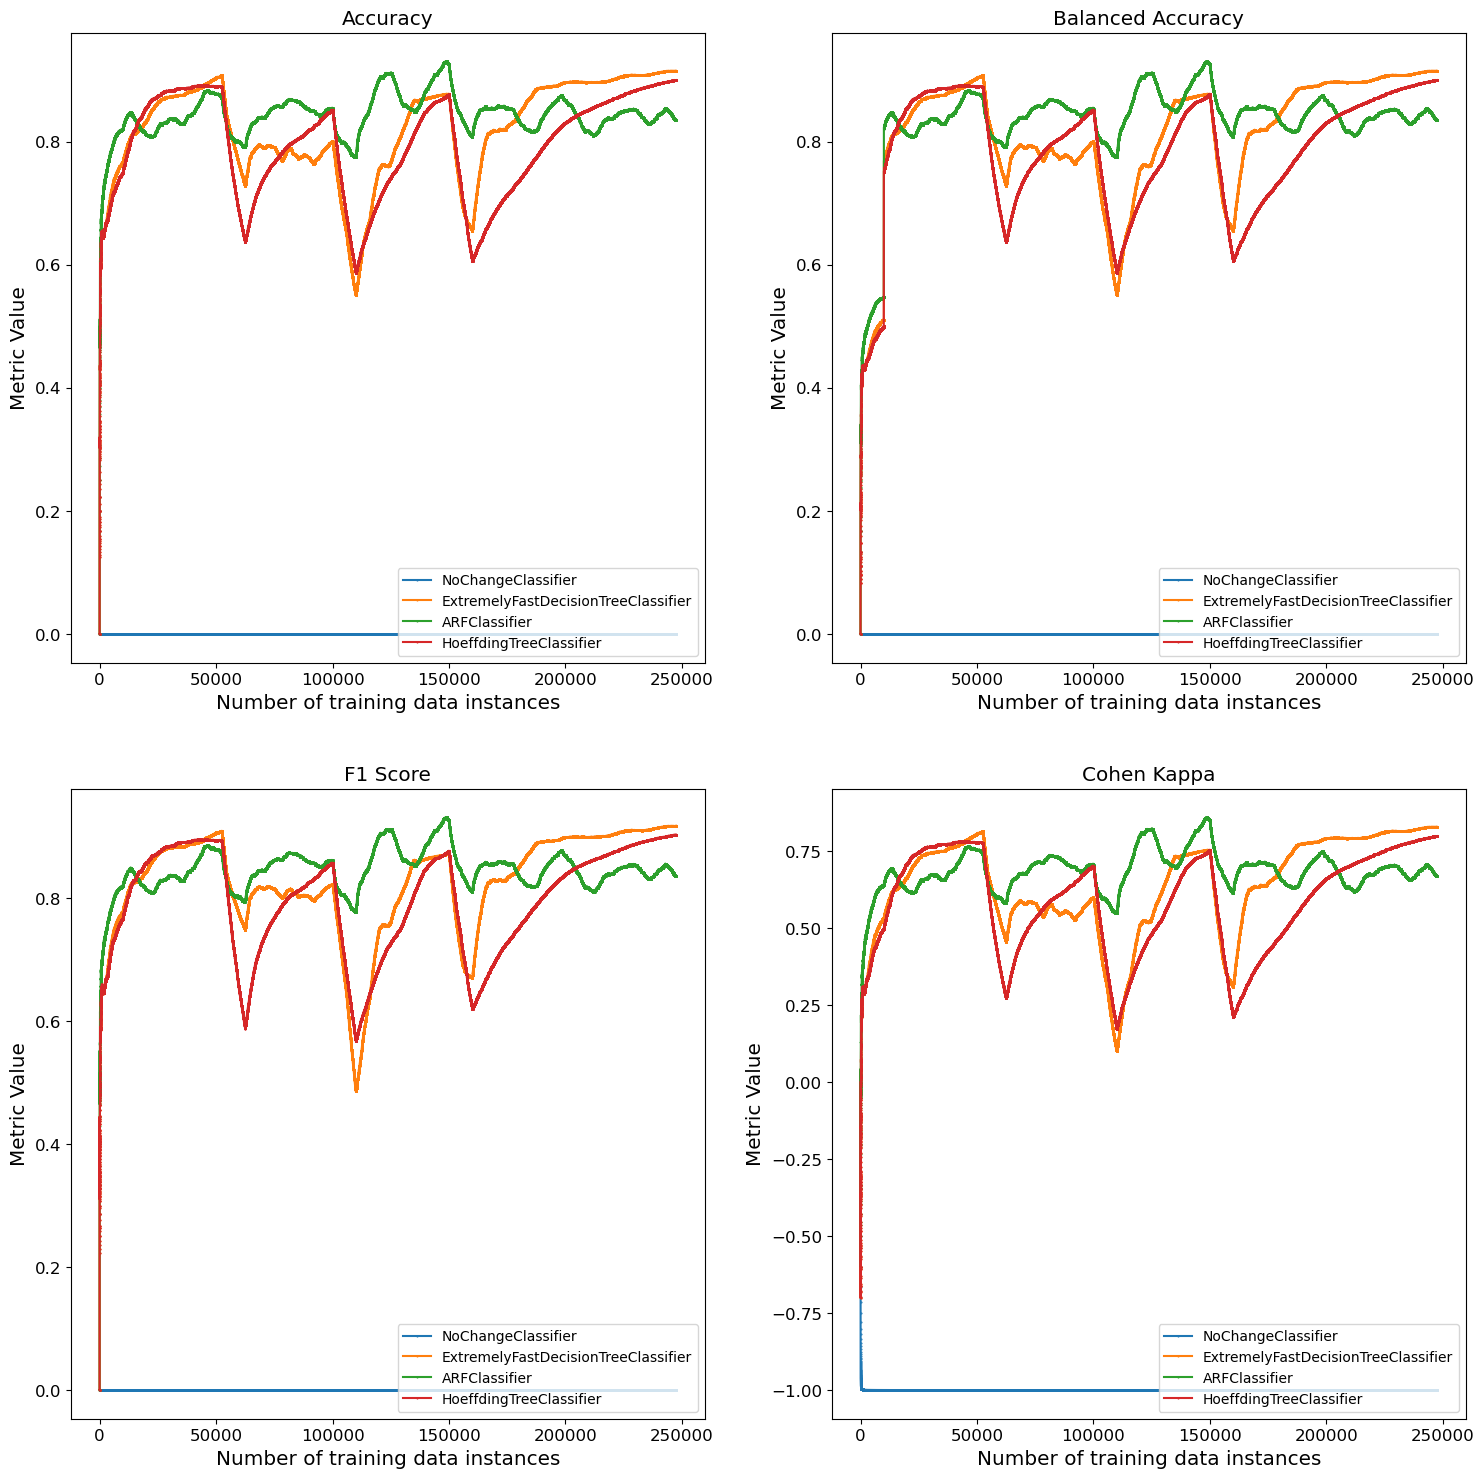

In [31]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf[pdf["R_Accuracy"] >= 0].n, pdf[pdf["R_Accuracy"] >= 0].R_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_2"] >= 0].n, pdf[pdf["R_Accuracy_2"] >= 0].R_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_3"] >= 0].n, pdf[pdf["R_Accuracy_3"] >= 0].R_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_4"] >= 0].n, pdf[pdf["R_Accuracy_4"] >= 0].R_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.R_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.R_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 1].set_title('Cohen Kappa')


for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')
#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center')
# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

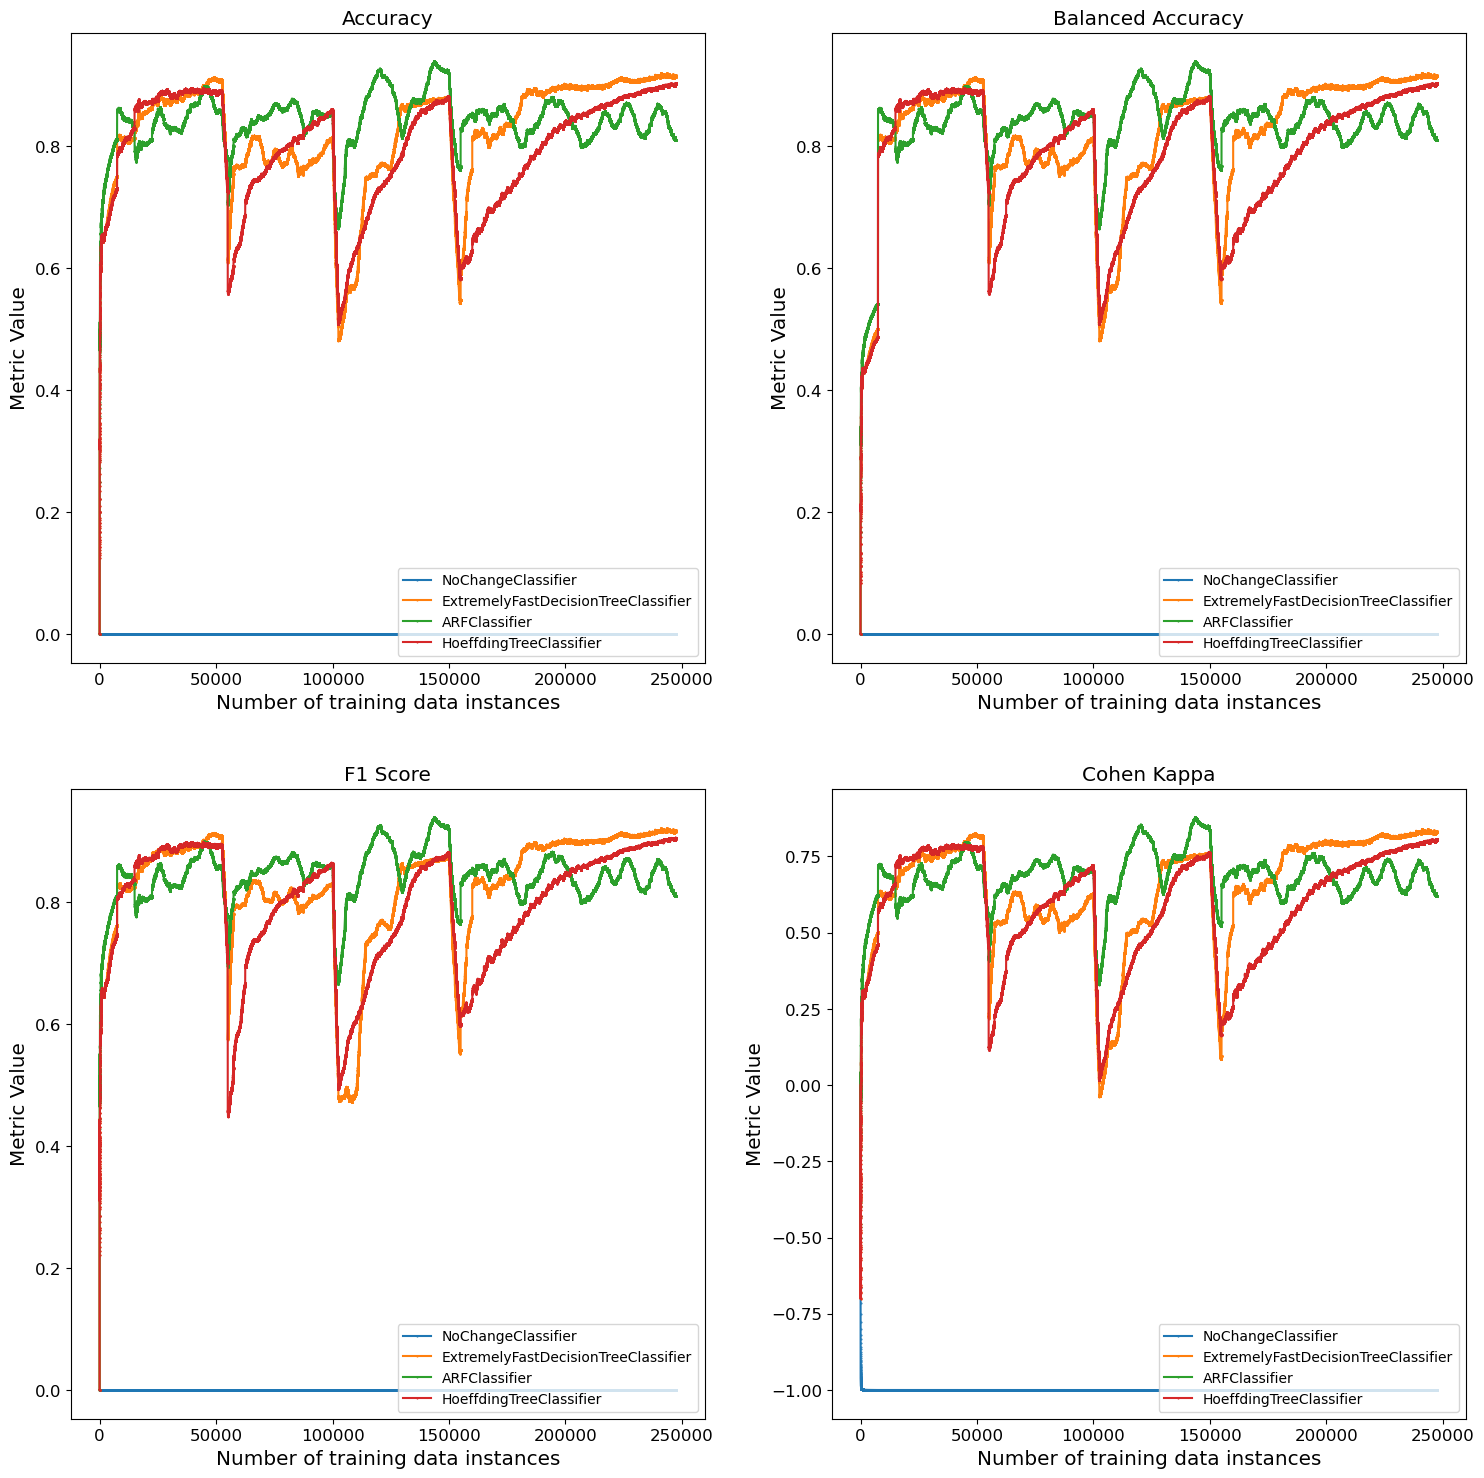

In [33]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf[pdf["TR_Accuracy"] >= 0].n, pdf[pdf["TR_Accuracy"] >= 0].TR_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["TR_Accuracy_2"] >= 0].n, pdf[pdf["TR_Accuracy_2"] >= 0].TR_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["TR_Accuracy_3"] >= 0].n, pdf[pdf["TR_Accuracy_3"] >= 0].TR_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["TR_Accuracy_4"] >= 0].n, pdf[pdf["TR_Accuracy_4"] >= 0].TR_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.TR_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.TR_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.TR_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.TR_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 1].set_title('Cohen Kappa')

for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

# Pretrained evaluation on whole data sets - CC

In [34]:
init = InitializeCC()
spark, input_schema, sc, sdf = init.spark, init.input_schema, init.sc, init.sdf

23/06/17 16:43:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
23/06/17 16:43:20 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/worker/evaluator.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 16:43:20 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/master/evaluator_handler.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 16:43:20 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/worker/drift_detector.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 16:43:20 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/master/drift_detector_handler.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 16:43:20 WARN SparkContext: The path /home/patryk_patrykwrona

In [35]:
#SET TASK
task = {"cluster-9e14-w-0": {"pretrained_models": ['NoChangeClassifier_cluster-9e14-w-0_271321.pkl', 
                                        'ExtremelyFastDecisionTreeClassifier_cluster-9e14-w-0_271321.pkl',
                                       'ARFClassifier_cluster-9e14-w-0_271321.pkl',
                                       'HoeffdingTreeClassifier_cluster-9e14-w-0_271321.pkl']}, 
        "cluster-9e14-w-1" : {"pretrained_models": ['NoChangeClassifier_cluster-9e14-w-0_271321.pkl', 
                                        'ExtremelyFastDecisionTreeClassifier_cluster-9e14-w-0_271321.pkl',
                                       'ARFClassifier_cluster-9e14-w-0_271321.pkl',
                                       'HoeffdingTreeClassifier_cluster-9e14-w-0_271321.pkl']}, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
       'eval_metrics': [metrics.Accuracy(), 
                        metrics.BalancedAccuracy(), 
                        metrics.F1(), 
                        metrics.CohenKappa()]}

In [36]:
data_cols = ['V' + str(i) for i in range(1,29)]
data_cols.append('Amount') 

em = evaluator_master.EvaluatorMaster(data_cols, task)

In [37]:
em.transform_and_collect(sdf, "/user/hdfs/evaluation/em/case4_eval", "/user/hdfs/evaluation/em/case4_eval/chk")

23/06/17 16:43:36 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/17 16:46:02 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 146186 milliseconds
ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/opt/conda/miniconda3/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [40]:
output_schema = em.output_schema

df = spark.read.format("csv").options(header='false').schema(output_schema). \
load("hdfs://cluster-9e14-m/user/hdfs/evaluation/em/case4_eval")
pdf = df.toPandas()

In [41]:
pdf = pdf[pdf["hostname"] == "cluster-9e14-w-0"]
print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training

(284807, 28)
121.57616


In [42]:
res = pdf.iloc[pdf.shape[0] - 1, :]
res

training_time                                  121.576157
n                                                  284807
hostname                                 cluster-9e14-w-0
hash                                     bueqb3r3k4fs80i1
model_name                             NoChangeClassifier
prediction                                            0.0
Accuracy                                         0.998273
BalancedAccuracy                                      0.5
F1                                                    0.0
CohenKappa                                            0.0
model_name_2          ExtremelyFastDecisionTreeClassifier
prediction_2                                          0.0
Accuracy_2                                       0.998806
BalancedAccuracy_2                               0.865488
F1_2                                             0.679245
CohenKappa_2                                      0.67865
model_name_3                                ARFClassifier
prediction_3  

In [45]:
print("@@@@@@@@@@@@@@@@@@@CREDIT CARD PPRETRAINED MODELS EVALUATION@@@@@@@@@@@@@@@@@@@")

print("-----NoChange classifier:")
print("Accuracy: " + str(res["Accuracy"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy"]))
print("F1 Score: " + str(res["F1"]))
print("Cohen Kappa: " + str(res["CohenKappa"]))

print("-----ExtremelyFast DT classifier:")
print("Accuracy: " + str(res["Accuracy_2"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy_2"]))
print("F1 Score: " + str(res["F1_2"]))
print("Cohen Kappa: " + str(res["CohenKappa_2"]))

print("-----ARF classifier:")
print("Accuracy: " + str(res["Accuracy_3"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy_3"]))
print("F1 Score: " + str(res["F1_3"]))
print("Cohen Kappa: " + str(res["CohenKappa_3"]))

print("-----ExtremelyFast DT classifier:")
print("Accuracy: " + str(res["Accuracy_4"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy_4"]))
print("F1 Score: " + str(res["F1_4"]))
print("Cohen Kappa: " + str(res["CohenKappa_4"]))

@@@@@@@@@@@@@@@@@@@CREDIT CARD PPRETRAINED MODELS EVALUATION@@@@@@@@@@@@@@@@@@@
-----NoChange classifier:
Accuracy: 0.99827254
Balanced Accuracy: 0.5
F1 Score: 0.0
Cohen Kappa: 0.0
-----ExtremelyFast DT classifier:
Accuracy: 0.99880624
Balanced Accuracy: 0.8654879
F1 Score: 0.6792453
Cohen Kappa: 0.6786504
-----ARF classifier:
Accuracy: 0.99940664
Balanced Accuracy: 0.8830351
F1 Score: 0.8169014
Cohen Kappa: 0.8166055
-----ExtremelyFast DT classifier:
Accuracy: 0.9993469
Balanced Accuracy: 0.8688022
F1 Score: 0.79605263
Cohen Kappa: 0.7957276


# Pretrained evaluation on whole data sets - Hyperplane

In [3]:
init = InitializeH()
spark, input_schema, sc, sdf = init.spark, init.input_schema, init.sc, init.sdf

23/06/17 16:53:52 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
#SET TASK
task = {"cluster-9e14-w-0": {"pretrained_models": ['NoChangeClassifier_cluster-9e14-w-0_40001.pkl', 
                                        'ExtremelyFastDecisionTreeClassifier_cluster-9e14-w-0_40001.pkl',
                                       'ARFClassifier_cluster-9e14-w-0_40001.pkl',
                                       'HoeffdingTreeClassifier_cluster-9e14-w-0_40001.pkl']}, 
        "cluster-9e14-w-1" : {"pretrained_models": ['NoChangeClassifier_cluster-9e14-w-0_40001.pkl', 
                                        'ExtremelyFastDecisionTreeClassifier_cluster-9e14-w-0_40001.pkl',
                                       'ARFClassifier_cluster-9e14-w-0_40001.pkl',
                                       'HoeffdingTreeClassifier_cluster-9e14-w-0_40001.pkl']}, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
       'eval_metrics': [metrics.Accuracy(), 
                        metrics.BalancedAccuracy(), 
                        metrics.F1(), 
                        metrics.CohenKappa()]}

In [5]:
data_cols = [field.name for field in input_schema.fields][:-1]

# data_cols = ['V' + str(i) for i in range(1,29)]
# data_cols.append('Amount') 

em = evaluator_master.EvaluatorMaster(data_cols, task)

In [6]:
em.transform_and_collect(sdf, "/user/hdfs/evaluation/em/case5_eval", "/user/hdfs/evaluation/em/case5_eval/chk")

23/06/17 16:54:32 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/06/17 16:54:32 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/17 16:54:32 WARN HadoopFSUtils: The directory hdfs://cluster-9e14-m/user/hdfs/stream/hyperplane/h7h3158f7b1q6inn.csv was not found. Was it deleted very recently?
23/06/17 16:54:32 WARN HadoopFSUtils: The directory hdfs://cluster-9e14-m/user/hdfs/stream/hyperplane/vvrgxraqkkhzwroe.csv was not found. Was it deleted very recently?
23/06/17 16:54:32 WARN HadoopFSUtils: The directory hdfs://cluster-9e14-m/user/hdfs/stream/hyperplane/eq151egt38zn8fl1.csv was not found. Was it deleted very recently?
23/06/17 16:54:32 WARN HadoopFSUtils: The directory hdfs://cluster-9e14-m/user/hdfs/stream/hyperplane/0awyc4dxfi3xkjgw.csv was not found. Was it deleted very recently?
23/0

KeyboardInterrupt: 

In [7]:
output_schema = em.output_schema

df = spark.read.format("csv").options(header='false').schema(output_schema). \
load("hdfs://cluster-9e14-m/user/hdfs/evaluation/em/case5_eval")
pdf = df.toPandas()

In [9]:
pdf = pdf[pdf["hostname"] == "cluster-9e14-w-0"]
print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training

import numpy as np
np.unique(pdf.hash, return_counts=True)

(145000, 28)
42.02605


(array(['q0dl7bcac6n1a6al'], dtype=object), array([145000]))

In [10]:
pdf = pdf.sort_values(by=['n'])

In [11]:
res = pdf.iloc[pdf.shape[0] - 1, :]
res

training_time                                   42.026051
n                                                  145000
hostname                                 cluster-9e14-w-0
hash                                     q0dl7bcac6n1a6al
model_name                             NoChangeClassifier
prediction                                            0.0
Accuracy                                         0.495407
BalancedAccuracy                                      0.5
F1                                                    0.0
CohenKappa                                            0.0
model_name_2          ExtremelyFastDecisionTreeClassifier
prediction_2                                          1.0
Accuracy_2                                       0.602966
BalancedAccuracy_2                               0.602934
F1_2                                             0.606499
CohenKappa_2                                     0.205867
model_name_3                                ARFClassifier
prediction_3  

In [13]:
print("@@@@@@@@@@@@@@@@@@@HYPERPLANE PPRETRAINED MODELS EVALUATION@@@@@@@@@@@@@@@@@@@")

print("-----NoChange classifier:")
print("Accuracy: " + str(res["Accuracy"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy"]))
print("F1 Score: " + str(res["F1"]))
print("Cohen Kappa: " + str(res["CohenKappa"]))

print("-----ExtremelyFast DT classifier:")
print("Accuracy: " + str(res["Accuracy_2"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy_2"]))
print("F1 Score: " + str(res["F1_2"]))
print("Cohen Kappa: " + str(res["CohenKappa_2"]))

print("-----ARF classifier:")
print("Accuracy: " + str(res["Accuracy_3"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy_3"]))
print("F1 Score: " + str(res["F1_3"]))
print("Cohen Kappa: " + str(res["CohenKappa_3"]))

print("-----ExtremelyFast DT classifier:")
print("Accuracy: " + str(res["Accuracy_4"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy_4"]))
print("F1 Score: " + str(res["F1_4"]))
print("Cohen Kappa: " + str(res["CohenKappa_4"]))

@@@@@@@@@@@@@@@@@@@HYPERPLANE PPRETRAINED MODELS EVALUATION@@@@@@@@@@@@@@@@@@@
-----NoChange classifier:
Accuracy: 0.4954069
Balanced Accuracy: 0.5
F1 Score: 0.0
Cohen Kappa: 0.0
-----ExtremelyFast DT classifier:
Accuracy: 0.60296553
Balanced Accuracy: 0.6029339
F1 Score: 0.6064989
Cohen Kappa: 0.20586704
-----ARF classifier:
Accuracy: 0.5347724
Balanced Accuracy: 0.53497404
F1 Score: 0.52671015
Cohen Kappa: 0.0699144
-----ExtremelyFast DT classifier:
Accuracy: 0.6068966
Balanced Accuracy: 0.60694903
F1 Score: 0.60684234
Cohen Kappa: 0.21386144


# Pretrained evaluation on whole data sets - Agrawal

In [14]:
init = InitializeA()
spark, input_schema, sc, sdf = init.spark, init.input_schema, init.sc, init.sdf

23/06/17 17:06:12 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
23/06/17 17:06:12 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/worker/evaluator.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 17:06:12 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/master/evaluator_handler.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 17:06:12 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/worker/drift_detector.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 17:06:12 WARN SparkContext: The path /home/patryk_patrykwrona/repos/Fleuve/master/drift_detector_handler.py has been added already. Overwriting of added paths is not supported in the current version.
23/06/17 17:06:12 WARN SparkContext: The path /home/patryk_patrykwrona

In [15]:
#SET TASK
task = {"cluster-9e14-w-0": {"pretrained_models": ['NoChangeClassifier_cluster-9e14-w-0_50001.pkl', 
                                        'ExtremelyFastDecisionTreeClassifier_cluster-9e14-w-0_50001.pkl',
                                       'ARFClassifier_cluster-9e14-w-0_50001.pkl',
                                       'HoeffdingTreeClassifier_cluster-9e14-w-0_50001.pkl']}, 
        "cluster-9e14-w-1" : {"pretrained_models": ['NoChangeClassifier_cluster-9e14-w-0_50001.pkl', 
                                        'ExtremelyFastDecisionTreeClassifier_cluster-9e14-w-0_50001.pkl',
                                       'ARFClassifier_cluster-9e14-w-0_50001.pkl',
                                       'HoeffdingTreeClassifier_cluster-9e14-w-0_50001.pkl']}, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
       'eval_metrics': [metrics.Accuracy(), 
                        metrics.BalancedAccuracy(), 
                        metrics.F1(), 
                        metrics.CohenKappa()]}

In [16]:
data_cols = [field.name for field in input_schema.fields][:-1]

# data_cols = ['V' + str(i) for i in range(1,29)]
# data_cols.append('Amount') 

em = evaluator_master.EvaluatorMaster(data_cols, task)

In [17]:
em.transform_and_collect(sdf, "/user/hdfs/evaluation/em/case6_eval", "/user/hdfs/evaluation/em/case6_eval/chk")

23/06/17 17:06:42 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/17 17:07:02 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 19893 milliseconds
ERROR:root:KeyboardInterrupt while sending command.                             
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/opt/conda/miniconda3/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [21]:
output_schema = em.output_schema

df = spark.read.format("csv").options(header='false').schema(output_schema). \
load("hdfs://cluster-9e14-m/user/hdfs/evaluation/em/case6_eval")
pdf = df.toPandas()

In [22]:
pdf = pdf[pdf["hostname"] == "cluster-9e14-w-1"]
print(pdf.shape)
print(np.max(pdf.training_time)) # seconds of training

import numpy as np
np.unique(pdf.hash, return_counts=True)

(125000, 28)
264.53342


(array(['s24wnb05r8cb9nl6'], dtype=object), array([125000]))

In [23]:
pdf = pdf.sort_values(by=['n'])

In [24]:
res = pdf.iloc[pdf.shape[0] - 1, :]
res

training_time                                  264.533417
n                                                  125000
hostname                                 cluster-9e14-w-1
hash                                     s24wnb05r8cb9nl6
model_name                             NoChangeClassifier
prediction                                            1.0
Accuracy                                              0.5
BalancedAccuracy                                      0.5
F1                                               0.666667
CohenKappa                                            0.0
model_name_2          ExtremelyFastDecisionTreeClassifier
prediction_2                                          0.0
Accuracy_2                                         0.8756
BalancedAccuracy_2                                 0.8756
F1_2                                             0.875251
CohenKappa_2                                       0.7512
model_name_3                                ARFClassifier
prediction_3  

In [25]:
print("@@@@@@@@@@@@@@@@@@@AGRAWAL PPRETRAINED MODELS EVALUATION@@@@@@@@@@@@@@@@@@@")

print("-----NoChange classifier:")
print("Accuracy: " + str(res["Accuracy"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy"]))
print("F1 Score: " + str(res["F1"]))
print("Cohen Kappa: " + str(res["CohenKappa"]))

print("-----ExtremelyFast DT classifier:")
print("Accuracy: " + str(res["Accuracy_2"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy_2"]))
print("F1 Score: " + str(res["F1_2"]))
print("Cohen Kappa: " + str(res["CohenKappa_2"]))

print("-----ARF classifier:")
print("Accuracy: " + str(res["Accuracy_3"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy_3"]))
print("F1 Score: " + str(res["F1_3"]))
print("Cohen Kappa: " + str(res["CohenKappa_3"]))

print("-----ExtremelyFast DT classifier:")
print("Accuracy: " + str(res["Accuracy_4"]))
print("Balanced Accuracy: " + str(res["BalancedAccuracy_4"]))
print("F1 Score: " + str(res["F1_4"]))
print("Cohen Kappa: " + str(res["CohenKappa_4"]))

@@@@@@@@@@@@@@@@@@@AGRAWAL PPRETRAINED MODELS EVALUATION@@@@@@@@@@@@@@@@@@@
-----NoChange classifier:
Accuracy: 0.5
Balanced Accuracy: 0.5
F1 Score: 0.6666667
Cohen Kappa: 0.0
-----ExtremelyFast DT classifier:
Accuracy: 0.8756
Balanced Accuracy: 0.8756
F1 Score: 0.8752507
Cohen Kappa: 0.7512
-----ARF classifier:
Accuracy: 0.7772
Balanced Accuracy: 0.7772
F1 Score: 0.7819961
Cohen Kappa: 0.5544
-----ExtremelyFast DT classifier:
Accuracy: 0.8644
Balanced Accuracy: 0.8644
F1 Score: 0.86412823
Cohen Kappa: 0.7288


# Virtual Drift Case

In [2]:
init = InitializeVD()
spark, input_schema, sc, sdf = init.spark, init.input_schema, init.sc, init.sdf

23/06/17 20:27:35 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
input_schema

StructType([StructField('V1', DoubleType(), True), StructField('Class', DoubleType(), True), StructField('index', DoubleType(), True)])

In [3]:
#SET TASK
task = {"cluster-9e14-w-0": {"models": [dummy.NoChangeClassifier(), 
                                        tree.ExtremelyFastDecisionTreeClassifier(max_depth = 20), 
                                        forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 20), 
                                        tree.HoeffdingTreeClassifier(max_depth = 20)]}, 
        "cluster-9e14-w-1" : {"models": [dummy.NoChangeClassifier(), 
                                        tree.ExtremelyFastDecisionTreeClassifier(max_depth = 20), 
                                        forest.ARFClassifier(seed = 44, n_models = 5, max_depth = 20), 
                                        tree.HoeffdingTreeClassifier(max_depth = 20)]}, 
        'workers': ["cluster-9e14-w-0", "cluster-9e14-w-1"],
       'eval_metrics': [utils.Rolling(metrics.Accuracy(), 10000), 
                        utils.Rolling(metrics.BalancedAccuracy(), 10000), 
                        utils.Rolling(metrics.F1(), 10000), 
                        utils.Rolling(metrics.CohenKappa(), 10000), 
                        utils.TimeRolling(metrics.Accuracy(), period=dt.timedelta(seconds = 20)), 
                        utils.TimeRolling(metrics.BalancedAccuracy(), period=dt.timedelta(seconds = 20)), 
                        utils.TimeRolling(metrics.F1(), period=dt.timedelta(seconds = 20)), 
                       utils.TimeRolling(metrics.CohenKappa(), period=dt.timedelta(seconds = 20))]}

In [4]:
data_cols = [field.name for field in input_schema.fields][:-2]

# data_cols = ['V' + str(i) for i in range(1,29)]
# data_cols.append('Amount') 

sm = stream_miner_master.StreamMinerMaster(data_cols, task)

In [34]:
data_cols

['V1']

In [5]:
sdf = sm.transform(sdf)





TypeError: Column is not iterable

In [6]:
sdf = sdf.withColumn("data", create_map(*sm.data_map))









In [7]:
sdf.printSchema()

root
 |-- V1: double (nullable = true)
 |-- Class: double (nullable = true)
 |-- index: double (nullable = true)
 |-- data: map (nullable = false)
 |    |-- key: string
 |    |-- value: double (valueContainsNull = true)



In [9]:

sdf = sdf.withColumn('results', sm.f_("data", "Class", *sm.caching_keys).alias("results")) # no support for multiple caching keys



23/06/17 20:35:26 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [10]:
sdf.printSchema()

root
 |-- V1: double (nullable = true)
 |-- Class: double (nullable = true)
 |-- index: double (nullable = true)
 |-- data: map (nullable = false)
 |    |-- key: string
 |    |-- value: double (valueContainsNull = true)
 |-- results: struct (nullable = true)
 |    |-- training_time: float (nullable = false)
 |    |-- n: integer (nullable = false)
 |    |-- hostname: string (nullable = false)
 |    |-- hash: string (nullable = false)
 |    |-- model_name: string (nullable = false)
 |    |-- prediction: double (nullable = false)
 |    |-- R_Accuracy: float (nullable = false)
 |    |-- R_BalancedAccuracy: float (nullable = false)
 |    |-- R_F1: float (nullable = false)
 |    |-- R_CohenKappa: float (nullable = false)
 |    |-- TR_Accuracy: float (nullable = false)
 |    |-- TR_BalancedAccuracy: float (nullable = false)
 |    |-- TR_F1: float (nullable = false)
 |    |-- TR_CohenKappa: float (nullable = false)
 |    |-- model_name_2: string (nullable = false)
 |    |-- prediction_2: doubl

In [36]:
sdf.printSchema()

root
 |-- results: struct (nullable = true)
 |    |-- training_time: float (nullable = false)
 |    |-- n: integer (nullable = false)
 |    |-- hostname: string (nullable = false)
 |    |-- hash: string (nullable = false)
 |    |-- model_name: string (nullable = false)
 |    |-- prediction: double (nullable = false)
 |    |-- R_Accuracy: float (nullable = false)
 |    |-- R_BalancedAccuracy: float (nullable = false)
 |    |-- R_F1: float (nullable = false)
 |    |-- R_CohenKappa: float (nullable = false)
 |    |-- TR_Accuracy: float (nullable = false)
 |    |-- TR_BalancedAccuracy: float (nullable = false)
 |    |-- TR_F1: float (nullable = false)
 |    |-- TR_CohenKappa: float (nullable = false)
 |    |-- model_name_2: string (nullable = false)
 |    |-- prediction_2: double (nullable = false)
 |    |-- R_Accuracy_2: float (nullable = false)
 |    |-- R_BalancedAccuracy_2: float (nullable = false)
 |    |-- R_F1_2: float (nullable = false)
 |    |-- R_CohenKappa_2: float (nullable = f

In [11]:
query = sdf.select('index', *sm.result_cols) \
            .writeStream \
            .format("csv")\
            .trigger(processingTime = "5 seconds")\
            .option("path", '/user/hdfs/evaluation/sm/case_vd')\
            .option("checkpointLocation", '/user/hdfs/evaluation/sm/case_vd/chk') \
            .start()

query.awaitTermination()

23/06/17 20:37:49 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/17 20:38:00 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 11009 milliseconds
23/06/17 20:38:07 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 6620 milliseconds
23/06/17 20:38:26 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 6517 milliseconds
23/06/17 20:38:31 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 5459 milliseconds
23/06/17 20:38:51 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 6991 milliseconds
23/06/17 20:38:57 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval

KeyboardInterrupt: 

In [12]:
output_schema = sm.output_schema

In [18]:
output_schema = sm.output_schema
output_schema2 = StructType([StructField('index', IntegerType(), False), *output_schema.fields])

In [19]:
output_schema2

StructType([StructField('index', IntegerType(), False), StructField('training_time', FloatType(), False), StructField('n', IntegerType(), False), StructField('hostname', StringType(), False), StructField('hash', StringType(), False), StructField('model_name', StringType(), False), StructField('prediction', DoubleType(), False), StructField('R_Accuracy', FloatType(), False), StructField('R_BalancedAccuracy', FloatType(), False), StructField('R_F1', FloatType(), False), StructField('R_CohenKappa', FloatType(), False), StructField('TR_Accuracy', FloatType(), False), StructField('TR_BalancedAccuracy', FloatType(), False), StructField('TR_F1', FloatType(), False), StructField('TR_CohenKappa', FloatType(), False), StructField('model_name_2', StringType(), False), StructField('prediction_2', DoubleType(), False), StructField('R_Accuracy_2', FloatType(), False), StructField('R_BalancedAccuracy_2', FloatType(), False), StructField('R_F1_2', FloatType(), False), StructField('R_CohenKappa_2', Flo

In [20]:
# output_schema = em.output_schema

df = spark.read.format("csv").options(header='false').schema(output_schema2). \
load("hdfs://cluster-9e14-m/user/hdfs/evaluation/sm/case_vd")


pdf = df.toPandas()

In [21]:
pdf.head()

,index,training_time,n,hostname,hash,model_name,prediction,R_Accuracy,R_BalancedAccuracy,R_F1,...,model_name_4,prediction_4,R_Accuracy_4,R_BalancedAccuracy_4,R_F1_4,R_CohenKappa_4,TR_Accuracy_4,TR_BalancedAccuracy_4,TR_F1_4,TR_CohenKappa_4
0,0,533.342163,179929,cluster-9e14-w-1,yt0eub7qsfe5b5du,NoChangeClassifier,1.0,0.6208,0.489464,0.230519,...,HoeffdingTreeClassifier,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0,533.359680,179930,cluster-9e14-w-1,yt0eub7qsfe5b5du,NoChangeClassifier,0.0,0.6207,0.489400,0.230473,...,HoeffdingTreeClassifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0,533.375000,179931,cluster-9e14-w-1,yt0eub7qsfe5b5du,NoChangeClassifier,1.0,0.6207,0.489397,0.230473,...,HoeffdingTreeClassifier,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,533.386047,179932,cluster-9e14-w-1,yt0eub7qsfe5b5du,NoChangeClassifier,0.0,0.6208,0.489464,0.230519,...,HoeffdingTreeClassifier,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,533.392151,179933,cluster-9e14-w-1,yt0eub7qsfe5b5du,NoChangeClassifier,0.0,0.6207,0.489400,0.230473,...,HoeffdingTreeClassifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
np.unique(pdf.hostname)

array(['cluster-9e14-w-1'], dtype=object)

In [23]:
pdf.shape

(299880, 45)

In [26]:
pdf = pdf.sort_values(by=['n'])

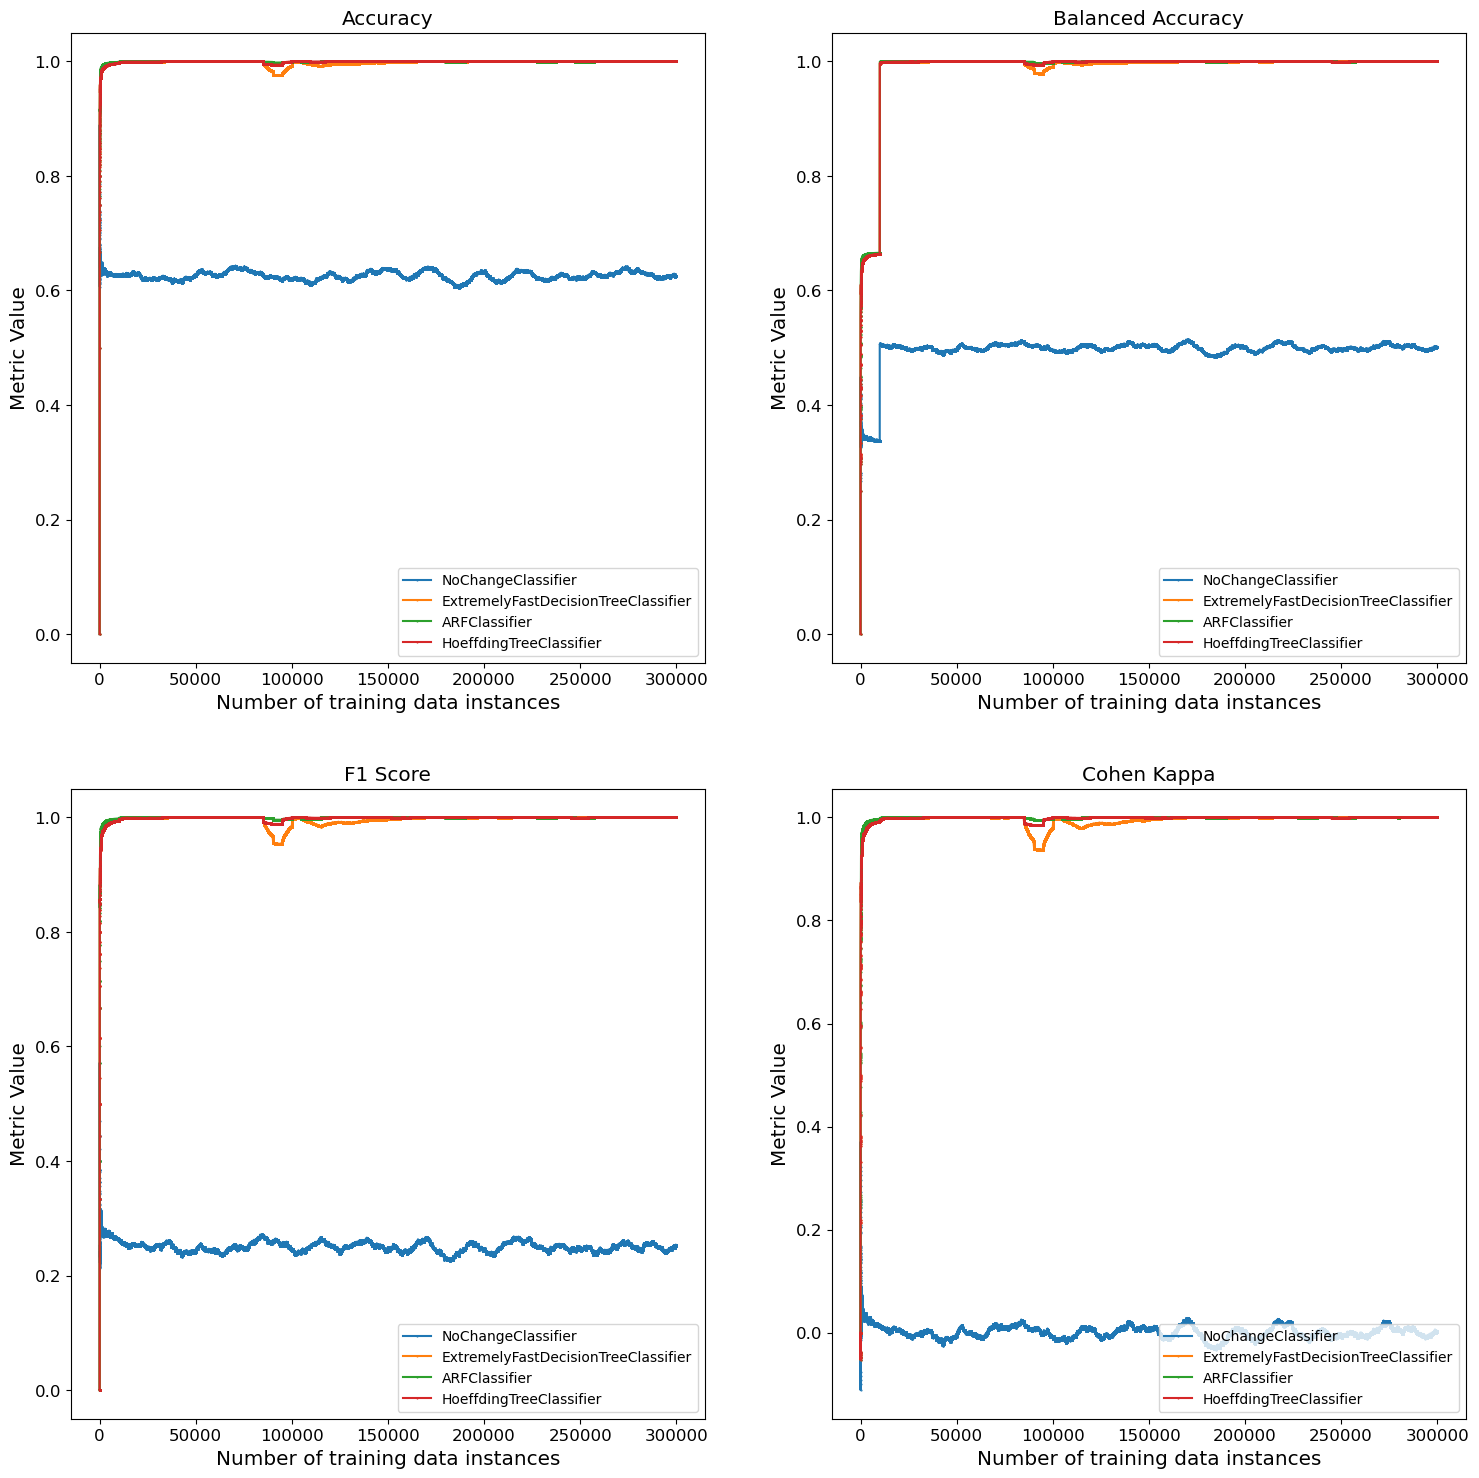

In [27]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf[pdf["R_Accuracy"] >= 0].n, pdf[pdf["R_Accuracy"] >= 0].R_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_2"] >= 0].n, pdf[pdf["R_Accuracy_2"] >= 0].R_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_3"] >= 0].n, pdf[pdf["R_Accuracy_3"] >= 0].R_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_4"] >= 0].n, pdf[pdf["R_Accuracy_4"] >= 0].R_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.R_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.R_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 1].set_title('Cohen Kappa')


for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')
#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center')
# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [28]:
import matplotlib.pyplot as plt

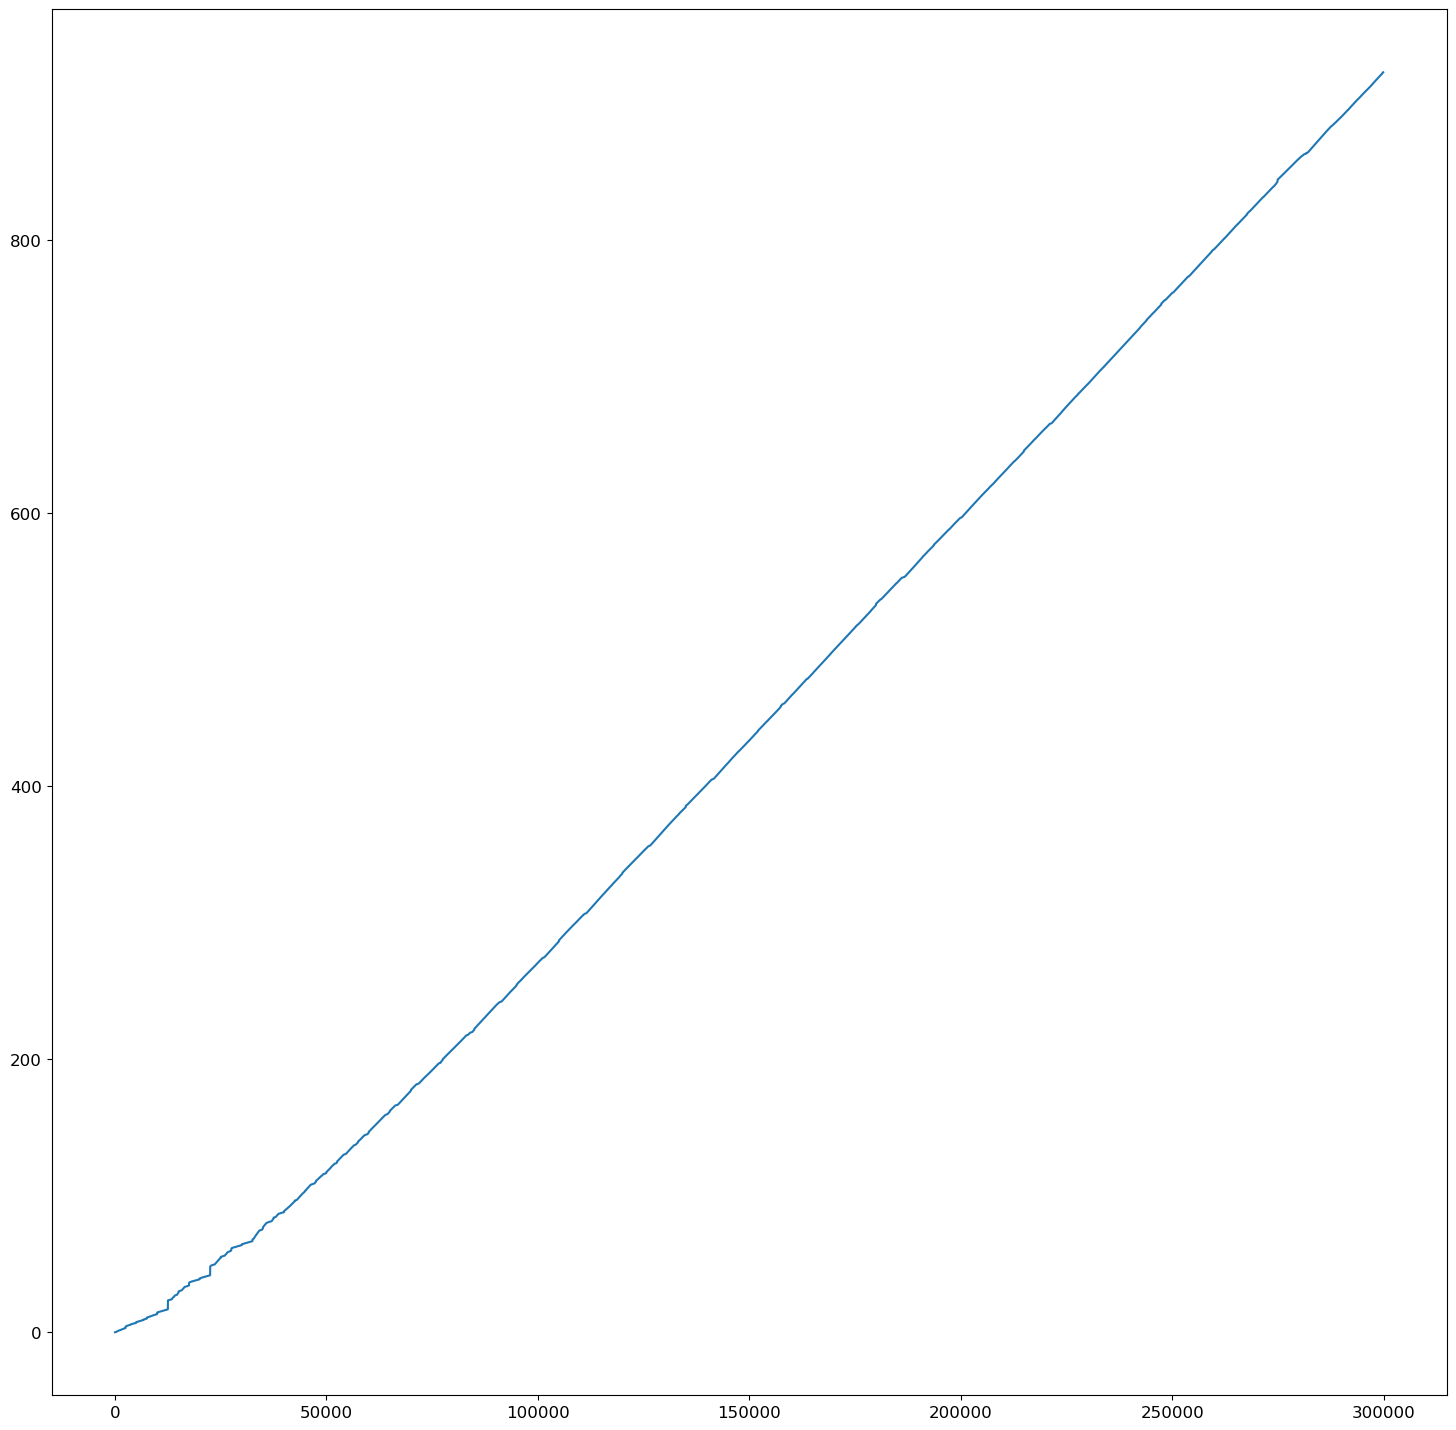

In [31]:
plt.plot(pdf.n, pdf.training_time)

In [32]:
query = sdf.select('index', *sm.result_cols) \
            .writeStream \
            .format("csv")\
            .trigger(processingTime = "5 seconds")\
            .option("path", '/user/hdfs/evaluation/sm/case_vd_a')\
            .option("checkpointLocation", '/user/hdfs/evaluation/sm/case_vd_a/chk') \
            .start()

query.awaitTermination()

23/06/17 21:45:44 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
23/06/17 21:45:50 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 5580 milliseconds
23/06/17 21:45:53 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 8230 milliseconds
23/06/17 21:46:12 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 12859 milliseconds
23/06/17 21:46:19 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 14192 milliseconds
23/06/17 21:46:29 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interval is 5000 milliseconds, but spent 16738 milliseconds
23/06/17 21:46:43 WARN ProcessingTimeExecutor: Current batch is falling behind. The trigger interv

KeyboardInterrupt: 

# Second case of virtual drift

In [34]:
# output_schema = em.output_schema

df = spark.read.format("csv").options(header='false').schema(output_schema2). \
load("hdfs://cluster-9e14-m/user/hdfs/evaluation/sm/case_vd_a")


pdf = df.toPandas()

In [35]:
np.unique(pdf.hostname)

array(['cluster-9e14-w-1'], dtype=object)

Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.socketAccept(Native Method)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:474)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:64)


In [36]:
pdf = pdf.sort_values(by=['n'])

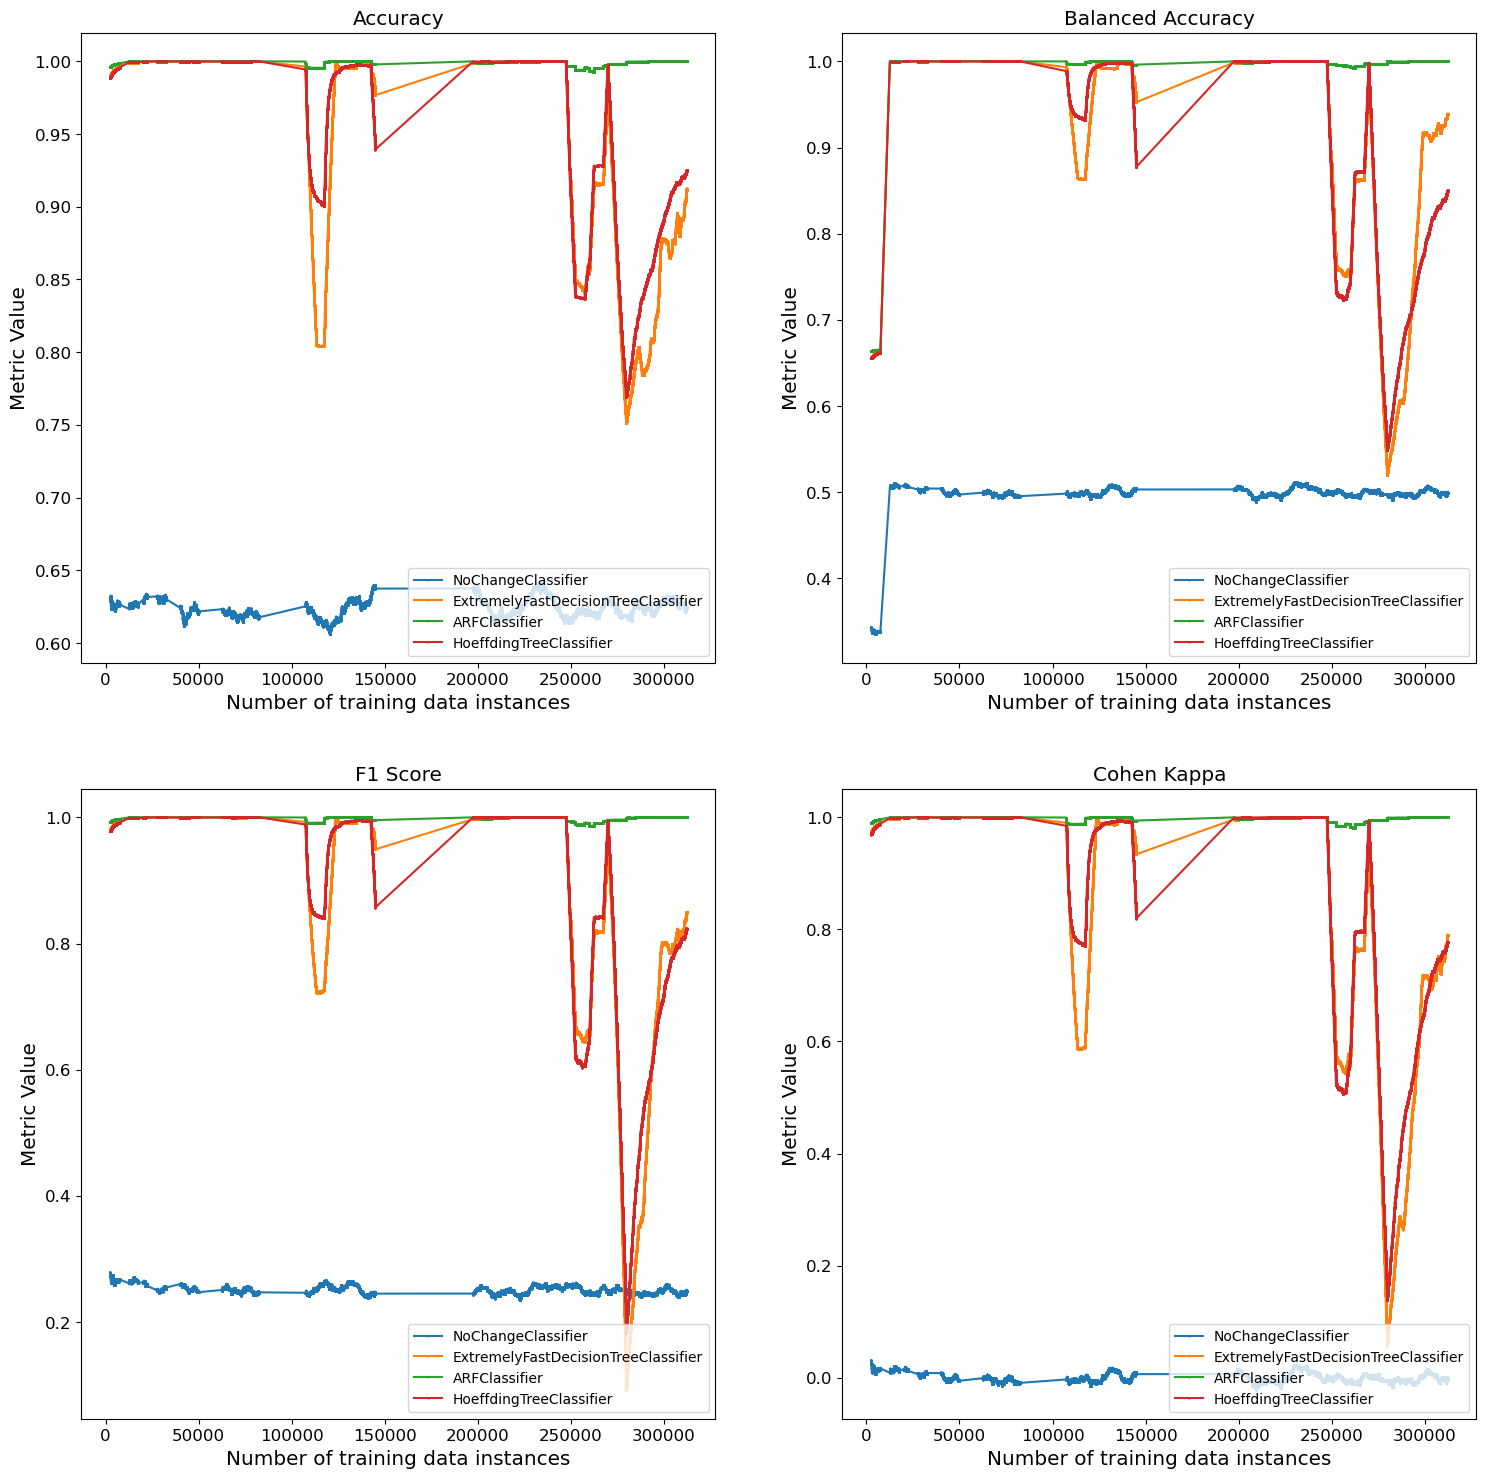

In [37]:
fig, axs = plt.subplots(2, 2)


axs[0, 0].plot(pdf[pdf["R_Accuracy"] >= 0].n, pdf[pdf["R_Accuracy"] >= 0].R_Accuracy, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_2"] >= 0].n, pdf[pdf["R_Accuracy_2"] >= 0].R_Accuracy_2, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_3"] >= 0].n, pdf[pdf["R_Accuracy_3"] >= 0].R_Accuracy_3, marker='.', markersize = 1)
axs[0, 0].plot(pdf[pdf["R_Accuracy_4"] >= 0].n, pdf[pdf["R_Accuracy_4"] >= 0].R_Accuracy_4, marker='.', markersize = 1)
axs[0,0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 0].set_title('Accuracy')

axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_2, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_3, marker='.', markersize = 1)
axs[0, 1].plot(pdf.n, pdf.R_BalancedAccuracy_4, marker='.', markersize = 1)
axs[0, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[0, 1].set_title('Balanced Accuracy')

axs[1, 0].plot(pdf.n, pdf.R_F1, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_2, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_3, marker='.', markersize = 1)
axs[1, 0].plot(pdf.n, pdf.R_F1_4, marker='.', markersize = 1)
axs[1, 0].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 0].set_title('F1 Score')

axs[1, 1].plot(pdf.n, pdf.R_CohenKappa, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_2, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_3, marker='.', markersize = 1)
axs[1, 1].plot(pdf.n, pdf.R_CohenKappa_4, marker='.', markersize = 1)
axs[1, 1].legend( ['NoChangeClassifier','ExtremelyFastDecisionTreeClassifier', 'ARFClassifier', 'HoeffdingTreeClassifier'], loc = 'lower right')
axs[1, 1].set_title('Cohen Kappa')


for ax in axs.flat:
    ax.set(xlabel='Number of training data instances', ylabel='Metric Value')
#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center')
# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()